# Kaggle Titanic Notebook

## Import data

In [245]:
import pandas as pd
df = pd.read_csv('./data/train.csv')
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory data analysis

### Shape of the data

In [246]:
df.shape

(891, 12)

### What is the base survival rate to begin with?
The algorithm should not simply learn to say that people on the Titanic will most likely die in general, regardless of features.

In [247]:
df[df['Survived'] == 1].shape[0] / df.shape[0]

0.3838383838383838

### Are there any columns having missing data?

In [248]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that the `Age` and `Cabin` columns have a significant amount of missing data. If those are to be used as features, data imputation techniques shall be explored and used to fill the missing values.

### What is the average metrics per by `Survived` value?

In [249]:
df.groupby(['Pclass']).mean().sort_values('Pclass').head(50)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


## Data transformation

### Sex: string to numeric

In [250]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Embarked: string to numeric

In [251]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
# df["Embarked"].unique().tolist()
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


### Age: filling up missing values

#### Age distribution
If there are clear clutter of ages, classification could be used in order to estimate the age of a passenger using other available features. From the distribution graph below, we see that there is no clear cluster of ages.

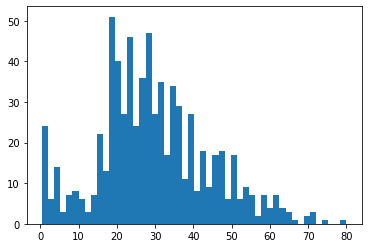

In [252]:
import matplotlib.pyplot as plt
df_find_age = df[df["Age"].notna()]
plt.hist(df_find_age["Age"], bins=50)
plt.show()

#### Correlated features
Since classification to find the age is not likely to work, a regression might be useful. In order to determine which features are correlated to the age, we can compute the correlation between the age and each feature.

In [253]:
import numpy as np
list_correlation = []
for col in df.columns:
    if col != "Age" and np.issubdtype(df[col].dtype, np.number):
        correlation = df[col].corr(df["Age"])
        list_correlation.append([
            col, correlation, abs(correlation)
        ])
pd.DataFrame(list_correlation, columns=["col", "corr", "abs_corr"]).sort_values(["abs_corr"])

,col,corr,abs_corr
7,Embarked,0.012186,0.012186
0,PassengerId,0.036847,0.036847
1,Survived,-0.077221,0.077221
3,Sex,-0.093254,0.093254
6,Fare,0.096067,0.096067
5,Parch,-0.189119,0.189119
4,SibSp,-0.308247,0.308247
2,Pclass,-0.369226,0.369226


#### Age imputation
Since the most highly correlated feature to the age is the `Pclass`, although not very high, the mean of each `Pclass` value will be used for the missing age value. For instance, if an age is missing but the passenger has `Pclass == 1`, then the age assigned will be the average age of the `Pclass == 1`.

In [254]:
class_1_mean = df[df["Pclass"] == 1]["Age"].mean()
class_2_mean = df[df["Pclass"] == 2]["Age"].mean()
class_3_mean = df[df["Pclass"] == 3]["Age"].mean()

df.loc[df["Age"].isna() & (df["Pclass"] == 1), "Age"] = class_1_mean
df.loc[df["Age"].isna() & (df["Pclass"] == 2), "Age"] = class_2_mean
df.loc[df["Age"].isna() & (df["Pclass"] == 3), "Age"] = class_3_mean

### Feature engineering

#### Has cabin

In [255]:
df.loc[df["Cabin"].isna(), "HasCabin"] = 0
df.loc[df["Cabin"].notna(), "HasCabin"] = 1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,1.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,0.0,0.0
5,6,0,3,"Moran, Mr. James",0,25.14062,0,0,330877,8.4583,NaN,2.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00000,0,0,17463,51.8625,E46,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00000,3,1,349909,21.0750,NaN,0.0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00000,0,2,347742,11.1333,NaN,0.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00000,1,0,237736,30.0708,NaN,1.0,0.0


## Machine learning
As the results show below, the random forest classifier seems more promising than the neural network for this problem. There is therefore more work put towards optimizing the hyperparameters of the random forest. Here are some description of the work done in order to optimize the model.

#### Training over varying `m` values
Train the model, increasing the number of sample data in the training set. For each trained model, compute the training and cross-validation error in order to plot them as a function of the number of training examples. This will help figure out whether we have a high bias (underfitting) problem or a high variance (overfitting) problem.

_**High bias**_

The training error converges to the cross validation error, but both are high. Possible solutions include:
* Feature engineering
* Decrease regularization parameter

_**High variance**_

The training error is small compared to the cross-validation error, and there is a large gap between both error. The ideal error is found between the two errors. Possible solutions include:
* Get more training examples (not possible in this case)
* Try smaller set of features
* Increase the regularization parameter

#### Training over varying depth of random forest to find an optimal value
When the depth of the random forest increases, so does the accuracy. The cross-validation dataset is used to compute the accuracy produced by the model. Whenever the error becomes small and plateau, or starts to rise again, the optimal value is found.

In [256]:
features_col = ["Fare", "Pclass", "SibSp", "Parch", "Embarked", "Sex", "Age", "HasCabin"]

### Random forest classifier

#### Training over varying `m` values

In [272]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ignore nan embarked since there are only two instances
df = df[~df["Embarked"].isna()]
df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=1), [int(.6 * len(df)), int(.8 * len(df))])
clf = RandomForestClassifier(max_depth=2, random_state=0)
list_m_errors = []

temp_df_train = df_train.reset_index()
step = 50
for i in range(50, temp_df_train.shape[0], step):
    subset_df_train = temp_df_train[(temp_df_train.index >= 0) & (temp_df_train.index < i)]
    clf.fit(subset_df_train[features_col], subset_df_train["Survived"])
    train_predict = clf.predict(subset_df_train[features_col])
    cv_predict = clf.predict(df_validate[features_col])
    list_m_errors.append([
        i,
        1 - accuracy_score(subset_df_train["Survived"], train_predict),
        1 - accuracy_score(df_validate["Survived"], cv_predict)
    ])

df_m_errors = pd.DataFrame(list_m_errors, columns=["m", "error_training", "error_cross_val"])
df_m_errors.head(50)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,m,error_training,error_cross_val
0,50,0.220000,0.303371
1,100,0.230000,0.280899
2,150,0.226667,0.235955
3,200,0.255000,0.269663
4,250,0.236000,0.247191
5,300,0.243333,0.292135
6,350,0.237143,0.275281
7,400,0.222500,0.297753
8,450,0.255556,0.275281
9,500,0.244000,0.292135


The training error and cross-validation error are both high. There must be a high bias problem. In the next section, we will increase the depth of the random forest, which adds more complexity to the model and which reduces the bias. If we are lucky, the bias will be low enough to give a fair result.

In [277]:
df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=1), [int(.6 * len(df)), int(.8 * len(df))])
list_m_errors = []
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(df_train[features_col], df_train["Survived"])
    train_predict = clf.predict(df_train[features_col])
    cv_predict = clf.predict(df_validate[features_col])
    list_m_errors.append([
        i,
        1 - accuracy_score(df_train["Survived"], train_predict),
        1 - accuracy_score(df_validate["Survived"], cv_predict)
    ])

df_m_errors = pd.DataFrame(list_m_errors, columns=["m", "error_training", "error_cross_val"])
df_m_errors.head(50)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

,m,error_training,error_cross_val
0,1,0.260788,0.286517
1,2,0.230769,0.269663
2,3,0.200750,0.252809
3,4,0.159475,0.185393
4,5,0.135084,0.179775
5,6,0.129456,0.185393
6,7,0.082552,0.179775
7,8,0.075047,0.168539
8,9,0.052533,0.185393
9,10,0.052533,0.185393


There is a significant drop from 3 to 4 depth in the cross validation error (25.3% to 18.5%), but the error fluctuates between 16-19% afterwards, while the training error continues to decrease. In other words, after 4 of depths, the model sta

### Multilayer perceptron classifier

In [258]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Ignore nan embarked since there are only two instances
df = df[~df["Embarked"].isna()]
df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=1), [int(.6 * len(df)), int(.8 * len(df))])
features_col = ["Fare", "Pclass", "SibSp", "Parch", "Embarked", "Sex", "Age", "HasCabin"]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
list_m_errors = []

temp_df_train = df_train.reset_index()
step = 20
for i in range(50, temp_df_train.shape[0], step):
    subset_df_train = temp_df_train[(temp_df_train.index >= 0) & (temp_df_train.index < i)]
    clf.fit(subset_df_train[features_col], subset_df_train["Survived"])
    train_predict = clf.predict(subset_df_train[features_col])
    cv_predict = clf.predict(df_validate[features_col])
    list_m_errors.append([
        i,
        1 - accuracy_score(subset_df_train["Survived"], train_predict),
        1 - accuracy_score(df_validate["Survived"], cv_predict)
    ])

df_m_errors = pd.DataFrame(list_m_errors, columns=["m", "error_training", "error_cross_val"])
df_m_errors.head(50)

,m,error_training,error_cross_val
0,50,0.500000,0.365169
1,70,0.414286,0.365169
2,90,0.444444,0.365169
3,110,0.436364,0.365169
4,130,0.430769,0.365169
5,150,0.433333,0.365169
6,170,0.429412,0.365169
7,190,0.400000,0.365169
8,210,0.395238,0.365169
9,230,0.378261,0.365169


From the above results, there must be a high bias problem, since the training and cross-validation error are both high.

#### Training over varying number of hidden layers
In order to find a somewhat optimized number of hidden layer, try to run train the model using varying number of hidden layers and look at the cross-validation error to choose the "optimal" number of hidden layer for the model.

#### Training

In [268]:
import numpy as np
from sklearn.neural_network import MLPClassifier

df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=1), [int(.6 * len(df)), int(.8 * len(df))])

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(df_train[features_col],
#         df_train["Survived"])

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(df_train[features_col],
        df_train["Survived"])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Errors (training and cross-validation)

Calculating training error:

In [269]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(df_train[features_col])
accuracy_score(df_train["Survived"], predictions)

0.8649155722326454

Calculating cross-validation error:

In [270]:
predictions = clf.predict(df_validate[features_col])
accuracy_score(df_validate["Survived"], predictions)

0.8202247191011236